# Classification d'√©motions dans les tweets avec la r√©gression logistique

## Installation des d√©pendances

In [ ]:
# Nous utilisons scikit-learn pour la mod√©lisation et le pr√©traitement
# !pip install scikit-learn


## Importation des biblioth√®ques
Nous allons utiliser plusieurs biblioth√®ques de **scikit-learn** pour pr√©traiter les donn√©es et entra√Æner le mod√®le de r√©gression logistique.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## Pourquoi la r√©gression logistique ?

La **r√©gression logistique** est un mod√®le de classification simple et efficace. Elle attribue des probabilit√©s aux diff√©rentes classes (dans notre cas, les √©motions et sentiments) en se basant sur les features (ou caract√©ristiques) qui correspondent aux tweet (avec la longueur, les mots, les charact√®res, ...).

- **Simple √† interpr√©ter** : La r√©gression logistique est un mod√®le lin√©aire. Elle est donc facile √† comprendre : les caract√©ristiques influencent directement la probabilit√© d'appartenance √† une classe.

- **Efficace pour la classification multi-classes** : La r√©gression logistique peut √™tre √©tendue √† la classification multi-classes (par exemple : joy, anger, sadness) en ajustant ses param√®tres internes.

- **Rapide √† entra√Æner** : Par rapport √† des mod√®les plus complexes comme les r√©seaux de neurones, la r√©gression logistique s'entra√Æne rapidement et n√©cessite moins de ressources.

https://mrmint.fr/wp-content/uploads/2017/09/one-vs-all-classification-768x480.png

## Jeu de donn√©es (tweets + √©motions)

In [ ]:
# tweets = [
#     ("I love the weather today!", "joy"),
#     ("I feel really sad now.", "sadness"),
#     ("I am so angry with the service.", "anger"),
#     ("This is so funny!", "joy"),
#     ("I'm disgusted by the behavior.", "disgust"),
#     ("This makes me so happy!", "joy"),
#     ("I can't stand this anymore!", "anger"),
#     ("I don't like the new update.", "disgust"),
#     ("I am crying because of the bad news.", "sadness"),
# ]

In [ ]:
# Charger le fichier Excel
df = pd.read_csv("tweets_data.csv", encoding="utf8", sep=";")

df['Text'] = df['Text'].astype(str).fillna("")
df['emotion'] = df['emotion'].astype(str).fillna("")

# S√©lectionner les colonnes pertinentes pour l'entra√Ænement
x = df['Text']       # Les tweets (features)
y = df['emotion']    # Les √©motions (labels)

# V√©rification des donn√©es
# print(df.head())

In [ ]:
# Pr√©parer les donn√©es pour l'entra√Ænement
# df = pd.DataFrame(tweets, columns=['text', 'emotion'])

# S√©parer les donn√©es en train/test
# x = df['text']  # Les tweets (features)
# y = df['emotion']  # Les √©motions (labels)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


## Pourquoi utiliser TF-IDF Vectorizer ?

Le TF-IDF Vectorizer transforme chaque tweet en un vecteur num√©rique, permettant au mod√®le de machine learning de comprendre le texte. TF-IDF combine deux √©l√©ments :

TF (Term Frequency) : fr√©quence d'un mot dans le tweet.
IDF (Inverse Document Frequency) : mesure l'importance du mot dans l'ensemble des tweets (les mots tr√®s fr√©quents dans tout le corpus sont moins importants. ex: Le, pour, de, comme, ...).

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)

`max_features=1000` limite le vocabulaire aux 1000 mots les plus fr√©quents mais il faut tester avec 500, 2000, 5000 en fonction de la taille du jeu de donn√©es et comparer les r√©sultats.

In [ ]:
x_train_tfidf = vectorizer.fit_transform(x_train)  # Apprendre le vocabulaire (enregistre dans vectorizer) et transformer les donn√©es d'entra√Ænement en vecteurs
x_test_tfidf = vectorizer.transform(x_test)  # Transformer les donn√©es de test en vecteurs en utilisant le m√™me vocabulaire (qui est dans vectorizer)

## Entra√Æner une r√©gression logistique

La r√©gression logistique est un mod√®le supervis√© (entra√Ænement d'un mod√®le avec un jeu de donn√©es comportant les r√©sultats).

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(x_train_tfidf, y_train)  # Entra√Ænement du mod√®le sur les donn√©es transform√©es

LogisticRegression(max_iter=200)

- `x_train_tfidf` : Vecteurs TF-IDF des tweets d‚Äôentra√Ænement.
- `y_train` : Les classes d'√©motions associ√©es aux tweets d‚Äôentra√Ænement.

Le mod√®le s'ajuste avec l'entra√Ænement.
Pour chaque donn√©e, le mod√®le va estimer l'√©motion, v√©rifier le r√©sultat associ√© et r√©ajuster ses param√®tres internes afin de minimiser l'erreur de pr√©diction autant que possible.

## Pr√©diction sur le jeu de test

In [ ]:
y_pred = model.predict(x_test_tfidf) # x : tweets / y : √©motions
accuracy = accuracy_score(y_test, y_pred) # proportion de tweets correctement class√©s
print("Proportion de tweets correctement class√©s")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Proportion de tweets correctement class√©s
Accuracy: 0.5924
Classification Report:
              precision    recall  f1-score   support

       anger       0.65      0.84      0.73       724
anticipation       0.50      0.58      0.53       508
     disgust       0.48      0.25      0.33       344
        fear       1.00      0.10      0.18        31
         joy       0.62      0.70      0.65       615
         nan       0.00      0.00      0.00         4
    optimism       0.71      0.24      0.36       142
     sadness       0.53      0.24      0.33       128
    surprise       0.00      0.00      0.00         4

    accuracy                           0.59      2500
   macro avg       0.50      0.33      0.35      2500
weighted avg       0.59      0.59      0.57      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


On utilise le mod√®le entra√Æn√© juste avant.

Le jeu de donn√©es n'est pas √©quilibr√© et ne repr√©sente pas correctement l'ensemble des √©motions.

### Visualisation du mod√®le

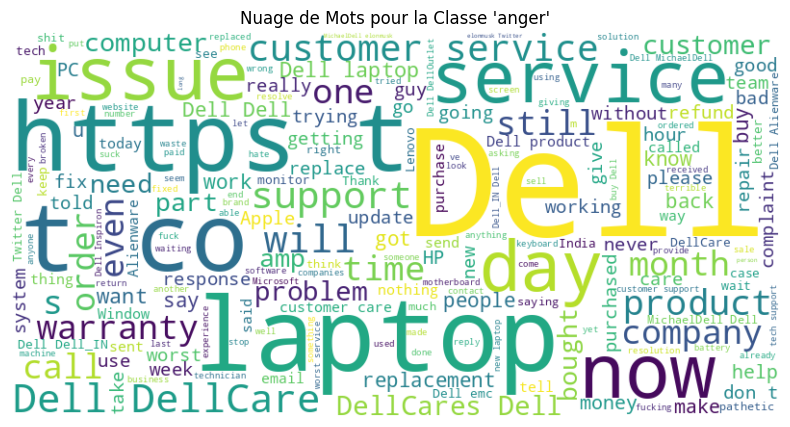

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Exemple pour la classe 'anger'
anger_text = " ".join(df[df['emotion'] == 'anger']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(anger_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de Mots pour la Classe 'anger'")
plt.show()


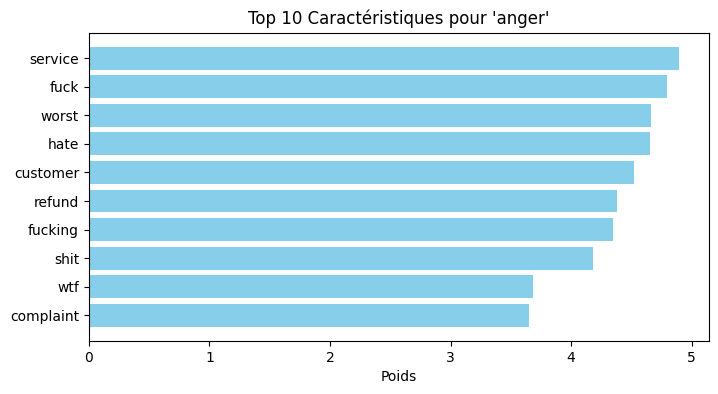

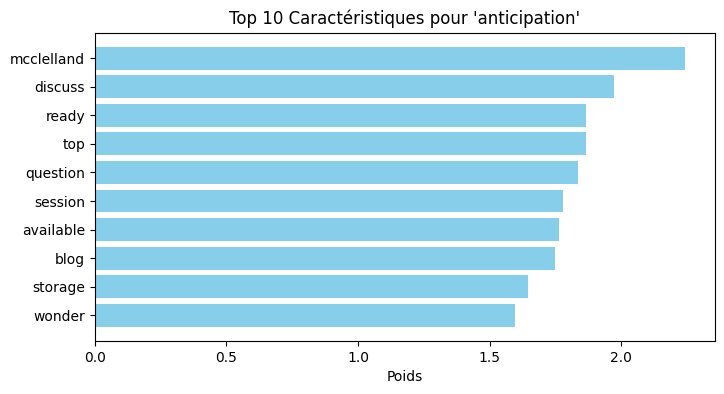

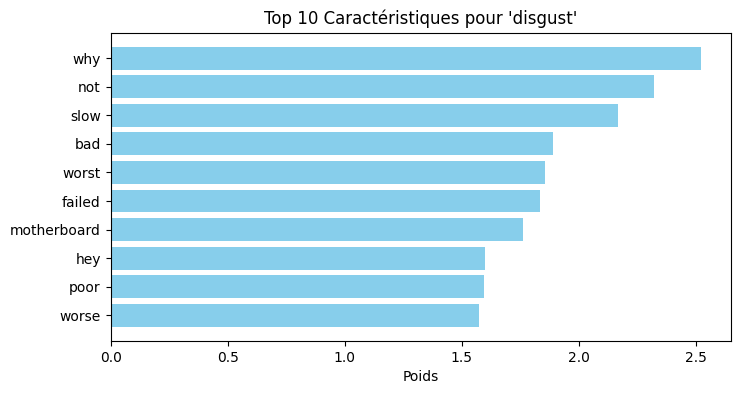

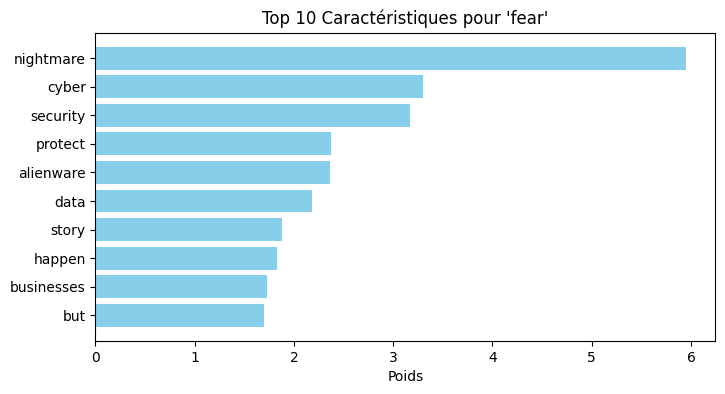

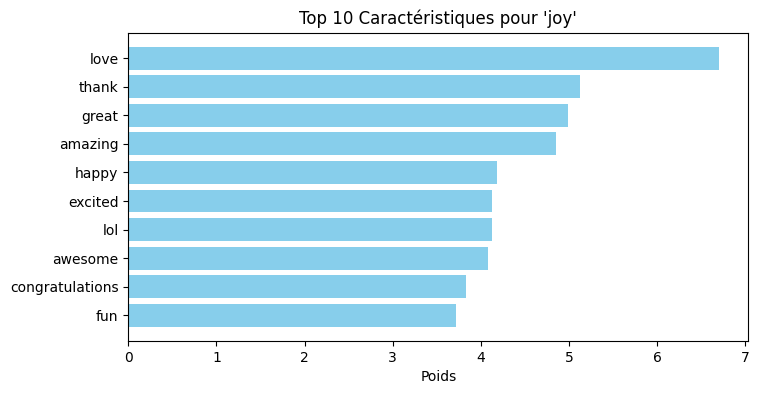

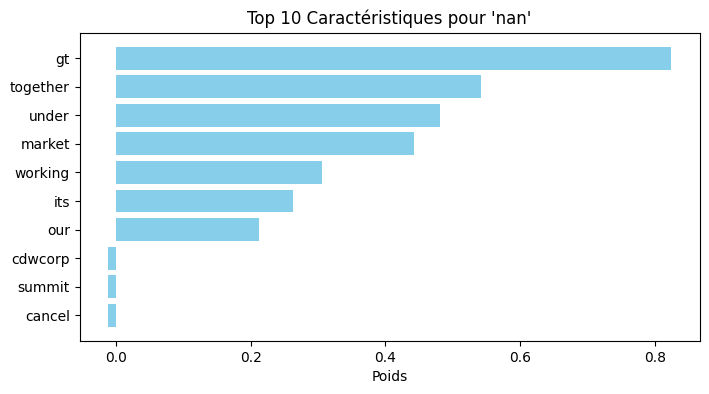

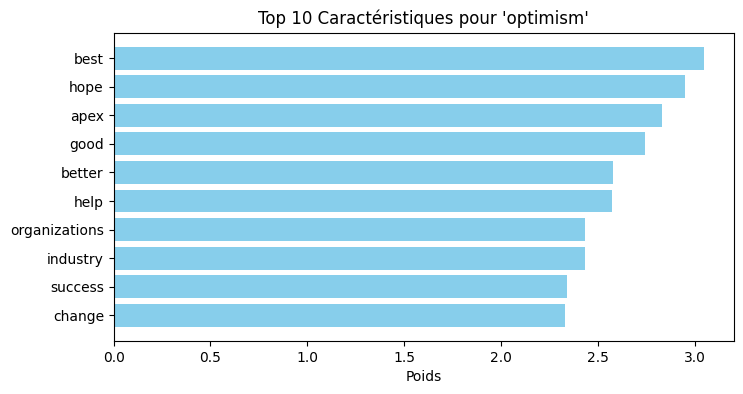

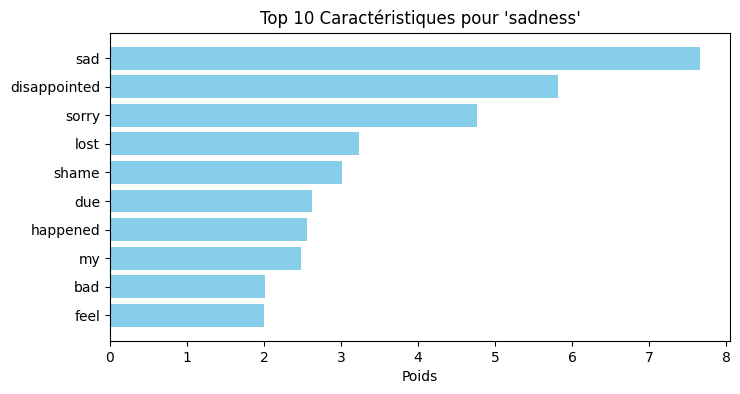

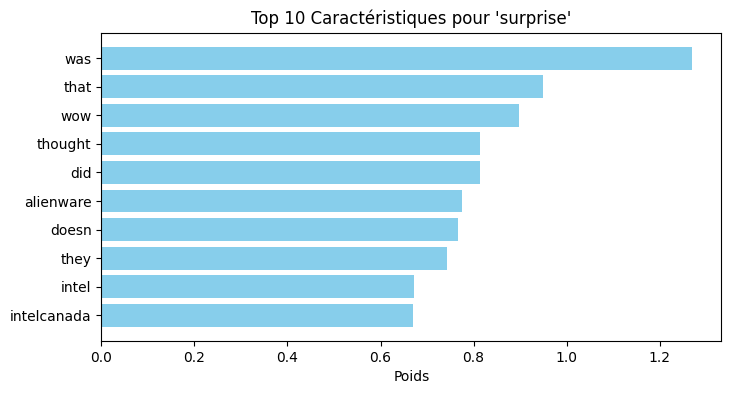

In [ ]:
import numpy as np

# Extraction des coefficients
coefficients = model.coef_  # coefficients pour chaque classe
feature_names = vectorizer.get_feature_names_out()

for i, emotion in enumerate(model.classes_):
    top10_indices = np.argsort(coefficients[i])[-10:]  # top 10 caract√©ristiques
    top10_features = feature_names[top10_indices]
    top10_weights = coefficients[i][top10_indices]

    plt.figure(figsize=(8, 4))
    plt.barh(top10_features, top10_weights, color="skyblue")
    plt.title(f"Top 10 Caract√©ristiques pour '{emotion}'")
    plt.xlabel("Poids")
    plt.show()


## Tester sur de nouveaux tweets

In [ ]:
new_tweets = [
    "I'm so happy with my results!",
    "This is the worst day ever.",
    "I can't believe it!",
    ":)",
    "üòÇ",
    "üôÇ"
]

# Transformation des nouveaux tweets avec le vectorizer d√©j√† entra√Æn√©
new_tweets_tfidf = vectorizer.transform(new_tweets)

# Pr√©diction des √©motions
predicted_emotions = model.predict(new_tweets_tfidf)

for tweet, emotion in zip(new_tweets, predicted_emotions):
    print(f"Tweet: '{tweet}' => Predicted Emotion: {emotion}")

Tweet: 'I'm so happy with my results!' => Predicted Emotion: joy
Tweet: 'This is the worst day ever.' => Predicted Emotion: anger
Tweet: 'I can't believe it!' => Predicted Emotion: anticipation
Tweet: ':)' => Predicted Emotion: anticipation
Tweet: 'üòÇ' => Predicted Emotion: anticipation
Tweet: 'üôÇ' => Predicted Emotion: anticipation


Pour des textes simples, le mod√®le fonctionne !